<a href="https://colab.research.google.com/github/daniyalaamir110/BREAKOUT/blob/master/Projects/3_medical_insurance_cost_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Regression Analysis

## Introduction

Healthcare costs in the United States are influenced by a myriad of factors, ranging from individual characteristics to lifestyle choices and geographic location. This notebook explores the relationships within a dataset capturing information about individuals and their medical insurance costs. The objective is to build a regression model that can predict the medical charges individuals might incur based on various features.

### Dataset Overview

The dataset includes the following columns:

- **`age`**: Age of the primary beneficiary.
- **`sex`**: Gender of the insurance contractor (female, male).
- **`bmi`**: Body Mass Index, a measure of body weight relative to height.
- **`children`**: Number of children covered by health insurance or number of dependents.
- **`smoker`**: Smoking status of the individual.
- **`region`**: Residential area in the US (northeast, southeast, southwest, northwest).
- **`charges`**: Individual medical costs billed by health insurance (the target variable).

**Download here:** [insurance.csv](https://www.kaggle.com/datasets/mirichoi0218/insurance/data/download)

### Objective

The primary goal of this analysis is to understand the factors contributing to variations in medical insurance costs and to develop a regression model that can accurately predict these costs. By examining the relationships between the independent variables (features) and the dependent variable (medical charges), we aim to gain insights that can inform healthcare policy, personalized insurance pricing, and individual health choices.

### Approach

1. **Exploratory Data Analysis (EDA):** We will begin with a thorough exploration of the dataset, visualizing distributions, correlations, and trends in the data to gain initial insights.
2. **Data Preprocessing:** Cleaning and transforming the data to ensure it is suitable for regression analysis.
3. **Feature Engineering:** Extracting meaningful information from existing features and creating new features if necessary.
4. **Model Building:** Developing regression models using suitable algorithms to predict medical insurance costs.
5. **Evaluation:** Assessing the model's performance and interpreting the significance of each feature.
6. **Conclusion:** Summarizing findings and suggesting potential applications or areas for further research.

This notebook serves as a comprehensive guide through each step of the regression analysis, providing code, visualizations, and interpretations to facilitate a clear understanding of the relationships between individual characteristics and medical insurance costs in the US.

Let's dive into the exploration and analysis of the medical insurance dataset!


# Initial Setup

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import joblib

## Loading the Dataset

In [2]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Statistics

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The statistics show that the means and standard deviations of the features are different which means that we should scale the features for better analysis.

## Null Values
Capturing and dealing with missing or null values is important for better analysis.

In [4]:
nulls = df.isnull().sum()
nulls_df = pd.DataFrame({'Column': nulls.index, 'Nulls': nulls.values})
nulls_df

,Column,Nulls
0,age,0
1,sex,0
2,bmi,0
3,children,0
4,smoker,0
5,region,0
6,charges,0


There are luckily no null values in the data

## Semantically Duplicate Values

Let's check if the categorical features have semantically unique values. For example, capturing spelling differences, case differences, short-forms, typos etc.

In [5]:
def show_categorical_colum_uniuqe_values(df, *cols):
  for col in cols:
    print(f"{col}:\t", df[col].unique())

show_categorical_colum_uniuqe_values(df, "sex", "smoker", "region")

sex:	 ['female' 'male']
smoker:	 ['yes' 'no']
region:	 ['southwest' 'southeast' 'northwest' 'northeast']


The results seem to be fine already.

## Encoding Labels


Label encoding is crucial in machine learning to convert categorical labels into numeric representations, ensuring algorithm compatibility, enabling mathematical operations, preventing misinterpretation, improving model performance, reducing memory usage, and promoting consistency and reproducibility. We have three categorical features: sex, smoker, and region.

In [6]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["sex"] = le.fit_transform(df["sex"])
df_encoded["smoker"] = le.fit_transform(df["smoker"])
df_encoded["region"] = le.fit_transform(df["region"])
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
show_categorical_colum_uniuqe_values(df_encoded, "sex", "smoker", "region")

sex:	 [0 1]
smoker:	 [1 0]
region:	 [3 2 1 0]


## Correlation Heatmap
Correlation heatmap depicts how strong the variables are mutually correlated. It helps in identifying the strong and weak predictors, and also mutually related features which reduce the model performance.

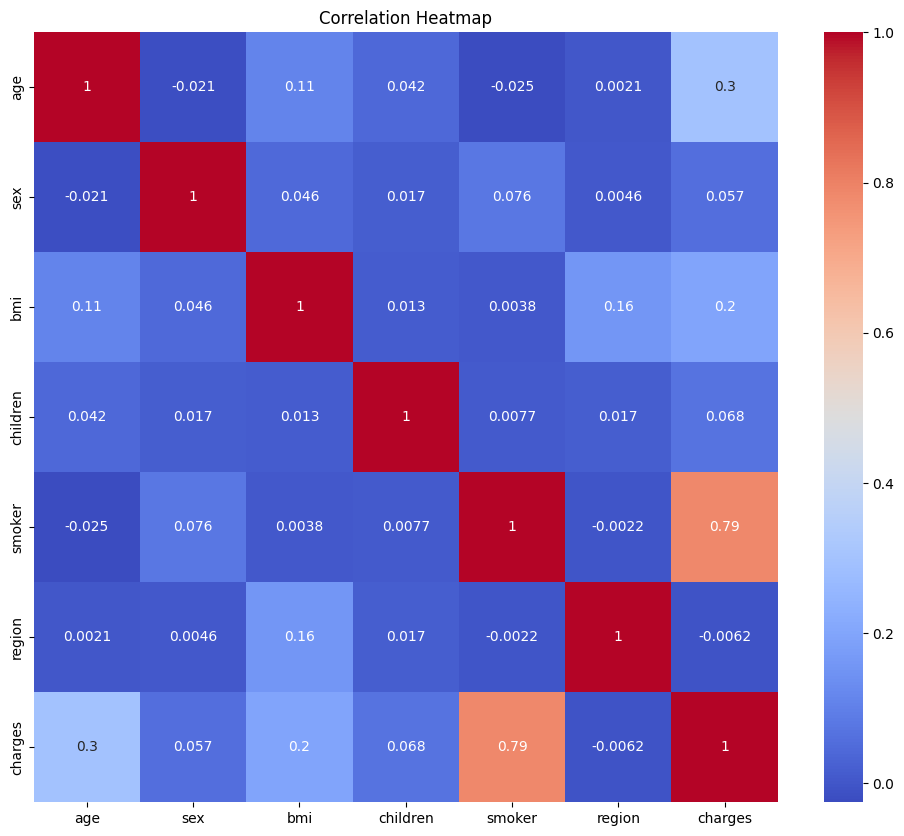

In [8]:
def heatmap(df):
  plt.figure(figsize=(12,10))
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
  plt.title("Correlation Heatmap")
  plt.show()

heatmap(df_encoded)

### Insights

- `smoker` has the highest, and `bmi` has a significant correlation with `charges`.
- `region` has very little or no correlation with `charges`.

### Drop Weak Predictors
As shown by heatmap, region has no strong impact on charges, so we shall drop that feature.

In [9]:
df_encoded = df_encoded.drop("region", axis=1)
df_encoded

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


## Scatter Plots
Scatter plots help in identifying the trends in target variable as a feature changes. It helps in identifying the relationships such as linear. It aslo helps in depicting which curve can fit the data in the best way. Let's analyze the scatter plots of each feature against `charges`.

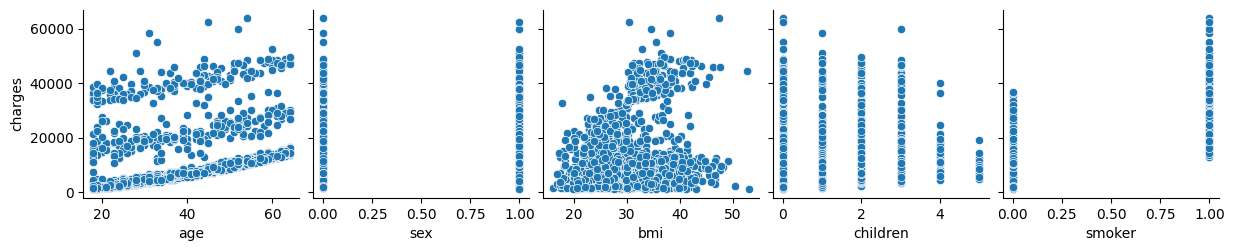

In [10]:
def plot_scatter_matrix(df, target):
  sns.pairplot(df, y_vars=[target], x_vars=df.columns.drop(target))
  plt.show()

plot_scatter_matrix(df_encoded, "charges")

### Insights
- `age` seems to have nearly linear relationship with `charges`. `charges` increase with age which is quite practically obvious. As we see different lines at different positions, it depicts that it strongly depends on some other feature as well such as a categorical feature.
- `smoker` seems to have strong impact on `charges`.

## Distribution Plots
A distribution plot visually represents the distribution of a single variable, providing insights into its central tendency, spread, and shape of the data.

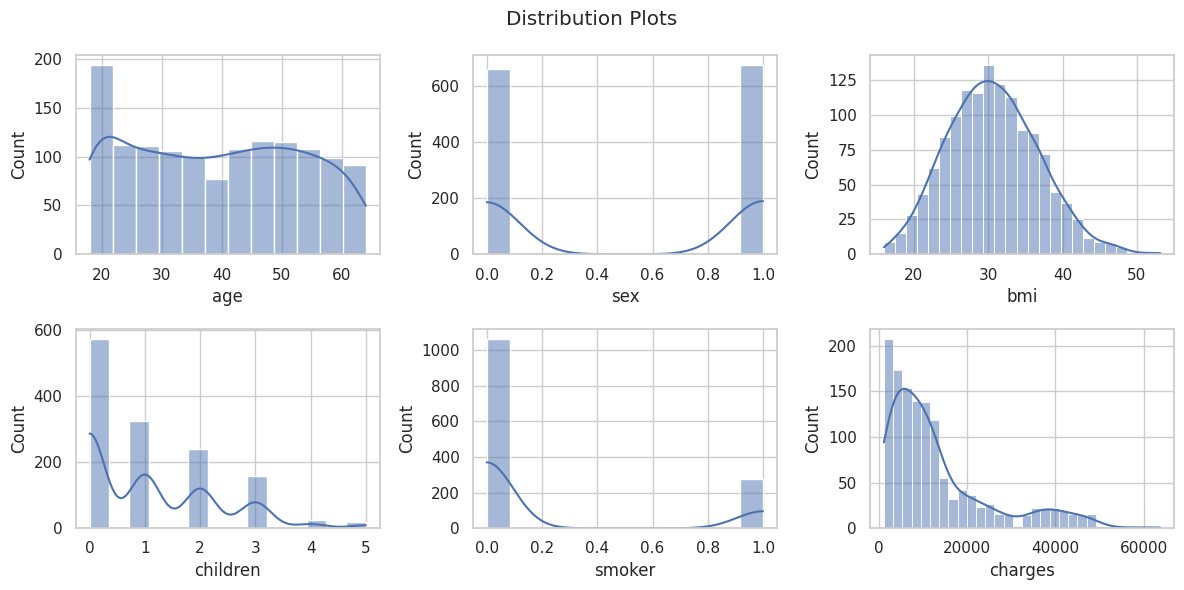

In [11]:
def plot_distributions(df):
  sns.set(style="whitegrid")
  num_columns = df.shape[1]
  num_rows = (num_columns - 1) // 3 + 1
  num_cols = min(num_columns, 3)
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
  axes = axes.flatten()
  for i, column in enumerate(df.columns):
      ax = axes[i]
      sns.histplot(df[column], kde=True, ax=ax)
  plt.suptitle("Distribution Plots")
  plt.tight_layout()
  plt.show()

plot_distributions(df_encoded)

### Insights
- `bmi` is normally distributed with mean at 30. 30 is the threshold value for obesity. The data shows that the maximum people who bore medical insurance costs had their `bmi` close or equal to 30.
- Only few of the individuals are `smoker`s.
- The `charges` are skewed to the right which means that most of the individuals bore relatively less `charges`.

In [12]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_features = X.columns

## Feature Scaling

### Peak-to-Peak Range
Let's see peek to peek ranges of each feature.

In [13]:
def get_ptp(X, X_features):
  return pd.DataFrame(data=X.ptp(axis=0), index=X_features, columns=["PTP Range"])

get_ptp(X.to_numpy(), X_features)

,PTP Range
age,46.00
sex,1.00
bmi,37.17
children,5.00
smoker,1.00


Since the ranges are very different, we need to scale the features.
### Scaling the Features

In [14]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

joblib.dump(scaler, "scaler.joblib")

get_ptp(X_norm, X_features)

,PTP Range
age,3.275255
sex,2.000109
bmi,6.097533
children,4.149232
smoker,2.478050


## Splitting the Data into Training and Test Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

## Linear Gradient Descent

Linear gradient descent is an iterative optimization algorithm used to minimize the cost function in machine learning models. Its primary goal is to find the optimal parameters for a model by adjusting them in the direction that reduces the cost, or error, of the model's predictions.

### Applying Linear Gradient Descent

In [16]:
sgdr = SGDRegressor()
sgdr = sgdr.fit(X_train, y_train)

### Score on Training and Test Sets

In [17]:
def get_accuracy(model, X_train, X_test, y_train, y_test):
  return pd.DataFrame(data=[
      model.score(X_train, y_train),
      model.score(X_test, y_test)
  ], index=[
      "Train Data",
      "Test Data"
  ], columns=["Accuracy"]
)

get_accuracy(sgdr, X_train, X_test, y_train, y_test)

,Accuracy
Train Data,0.741007
Test Data,0.780915


This is a pretty staightforward approach. However, linear regression might underfit the data which is why we are not getting a high score. In this case, we shall try polynomial features to fit the data much better.

## Polynomial Gradient Descent
Polynomial gradient descent extends the principles of gradient descent to optimize models with polynomial features, allowing for more complex relationships between input variables and the target.

### Generating Polynomial Features
In order to avoid overfitting, it is preferable to just keep the degree 2 here.

In [18]:
pf = PolynomialFeatures(degree=2)
X_quad = pf.fit_transform(X_norm)

X_quad.shape, X.shape

((1338, 21), (1338, 5))

### Splitting the Data into Training and Test Sets

In [19]:
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_quad, y, test_size=0.1, random_state=42)

### Applying Polynomial Gradient Descent

In [20]:
sgdr_pf = SGDRegressor()
sgdr_pf = sgdr_pf.fit(X_train_pf, y_train_pf)

### Score on Training and Test Sets

In [21]:
get_accuracy(sgdr_pf, X_train_pf, X_test_pf, y_train_pf, y_test_pf)

,Accuracy
Train Data,0.841296
Test Data,0.849285


Atleast, better than the linear approach! Now, we also note that there are categorical features in our data, and they might have complex relationships to make predictions so we can try decision tree or random forest regressor.

## Random Forest Regression
Random Forest is an ensemble learning method that consists of multiple Decision Trees.

It builds multiple Decision Trees by using a random subset of features and a random subset of the training data for each tree.

Random Forest mitigates overfitting by combining the predictions of multiple trees, reducing the risk of capturing noise in the data.

Random Forest tends to provide more accurate and robust predictions compared to a single Decision Tree. It's less interpretable due to the complexity of the ensemble.

### Additional Analysis for Random Forest

### Scatter Plots

#### 1. Differentiating by `smoker`

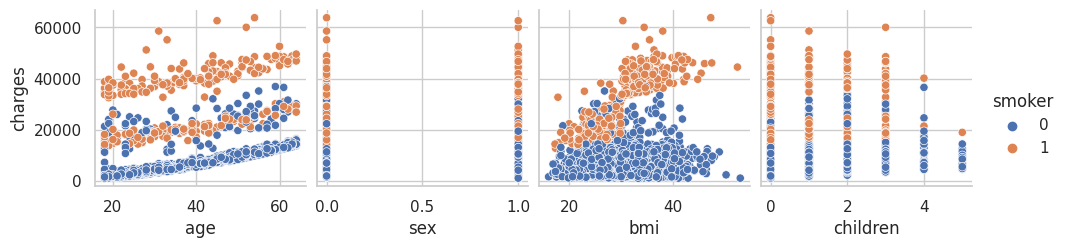

In [22]:
def plot_scatter_matrix_hue(df, target, categorize_by):
  sns.pairplot(df, y_vars=[target], x_vars=df.columns.drop(target).drop(categorize_by), hue=categorize_by)
  plt.show()

plot_scatter_matrix_hue(df_encoded, "charges", "smoker")

##### **Insights**
- As seen by the diagrams, we see that `smoker`s bear the highest `charges`.
- Specifically, the impact of `bmi` is greater in case of `smoker == 1`.

#### 2. Differentiating by `sex`

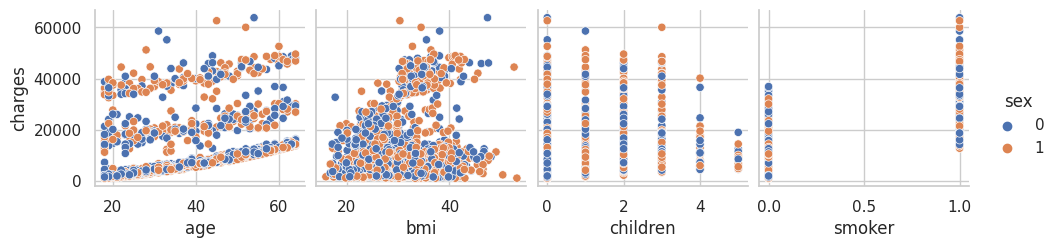

In [23]:
plot_scatter_matrix_hue(df_encoded, "charges", "sex")

#### 3. Differentiating by `children`

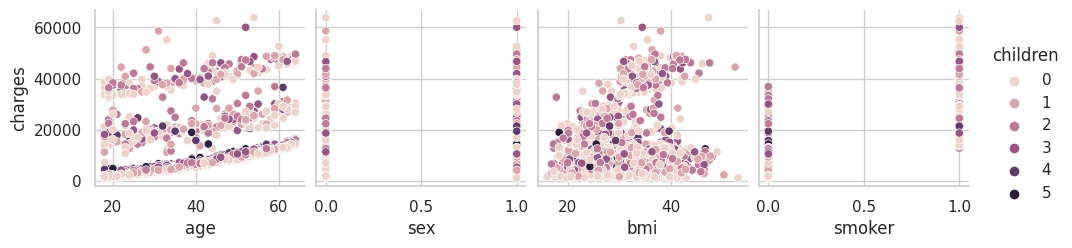

In [24]:
plot_scatter_matrix_hue(df_encoded, "charges", "children")

##### **Insights**
- There seems to be no or very little specific inference to the value of `charges` based on `sex`.

#### 4. Differentiating by `weight_class`
According to `bmi`, following are the typical ranges and the assoiciated weight classes.

| BMI Range       | Weight Class          |
| --------------- | --------------------- |
| Below 18.5      | Underweight           |
| 18.5 – 24.9     | Normal Weight         |
| 25.0 – 29.9     | Overweight            |
| 30.0 and above  | Obesity (Class 3)     |

Let's generate this column `weight_class` and analyze the scatter plots.

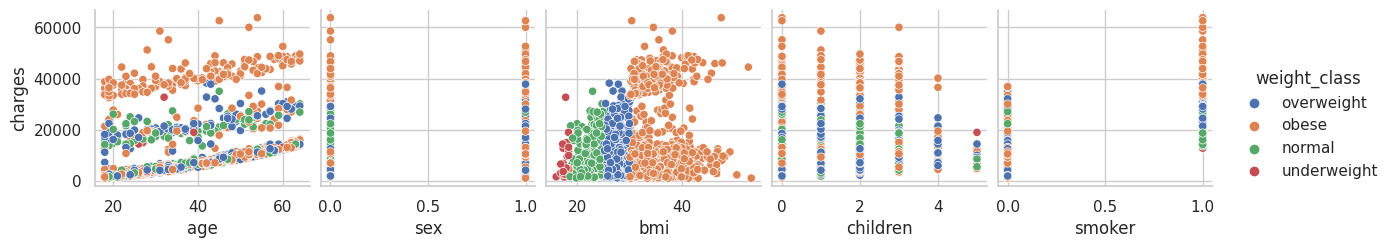

In [25]:
df_weights = df_encoded.copy()
df_weights["weight_class"] = df_weights["bmi"].apply(lambda x: "underweight" if x < 18.5 else ("normal" if 18.5 < x < 25 else ("overweight" if 25 <= x < 30 else "obese")))
plot_scatter_matrix_hue(df_weights, "charges", "weight_class")

##### **Insights**
- As shown in the plots, we clearly see that the order of `charges` is according to the order of `weight_class`.

### Category Plots

#### 1. By `weight_class`

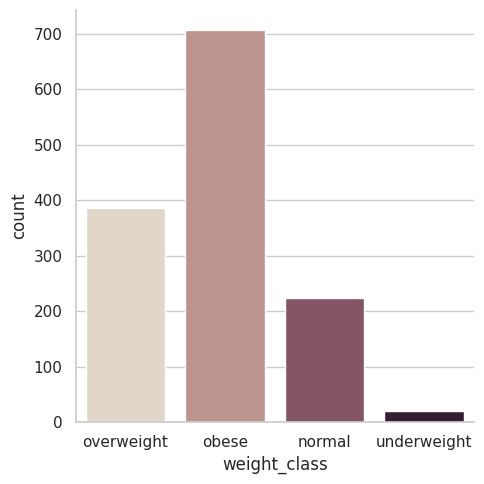

In [26]:
sns.catplot(x="weight_class", kind="count", palette="ch:.25", data=df_weights)
plt.show()

##### **Insights**
- Most of the cases involved an obese person, which is understandable

#### 2. By `children`

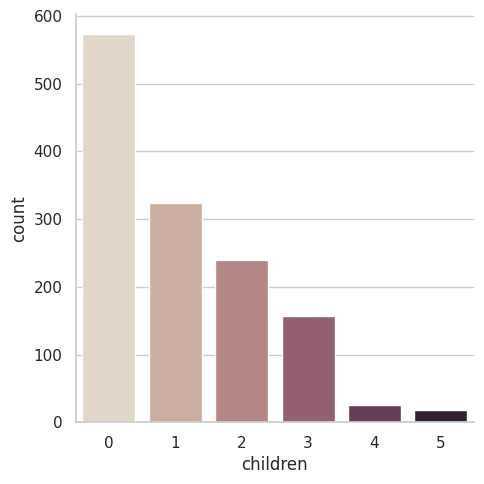

In [27]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df_weights)
plt.show()

##### **Insights**
- Most of the individuals have no or relatively less children. It seems like people having more children typically take good care of their health.

#### 3. By `sex` and `smoker`

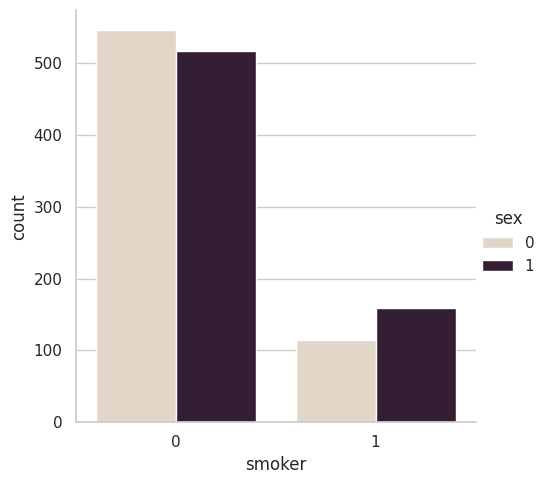

In [28]:
sns.catplot(x="smoker", hue="sex", kind="count", palette="ch:.25", data=df_weights)
plt.show()

##### **Insights**
- It seems that `smoker`s don't care much about their health which is why they have smaller count.

## Apply Random Forest

In [29]:
forest = RandomForestRegressor(n_estimators=100, criterion="squared_error", random_state=1, n_jobs=-1)
forest = forest.fit(X_train, y_train)

### Score on Training and Test Sets

In [30]:
get_accuracy(forest, X_train, X_test, y_train, y_test)

,Accuracy
Train Data,0.973950
Test Data,0.859637


And it turns out to give a much better performance.